# MULTIPLE LINEAR REGRESSION

#### Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

#### Task
1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5. Apply Lasso and Ridge methods on the model.

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load dataset 'ToyotaCorolla - MLR.csv'

data_og = pd.read_csv('ToyotaCorolla - MLR.csv')
data_og.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


#### EDA

In [3]:
# Summary statistics
print("Summary Statistics: \n")
data_og.describe()

Summary Statistics: 



,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
data_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
# Checking for missing values
data_og.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
# Checking for Duplicates

if(data_og.duplicated().sum() != 0):
    print("Duplicates are present \nNo.of duplicated rows: ",data_og.duplicated().sum())
else:
    print("No Duplicates")

# Print Duplicated values
data_og[data_og.duplicated(keep = False)]

Duplicates are present 
No.of duplicated rows:  1


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
# Remove Duplicates

data = data_og.drop_duplicates()

print("No.of Duplicated rows: ", data.duplicated().sum())

No.of Duplicated rows:  0


In [8]:
# Remove column Cylinders as it contains single value

data = data.drop('Cylinders', axis = 1)
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [9]:
# Rename the columns 'Age_08_04' and 'cc'
data.rename(columns = {'Age_08_04':'Age', 'cc':'CC'}, inplace = True)
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


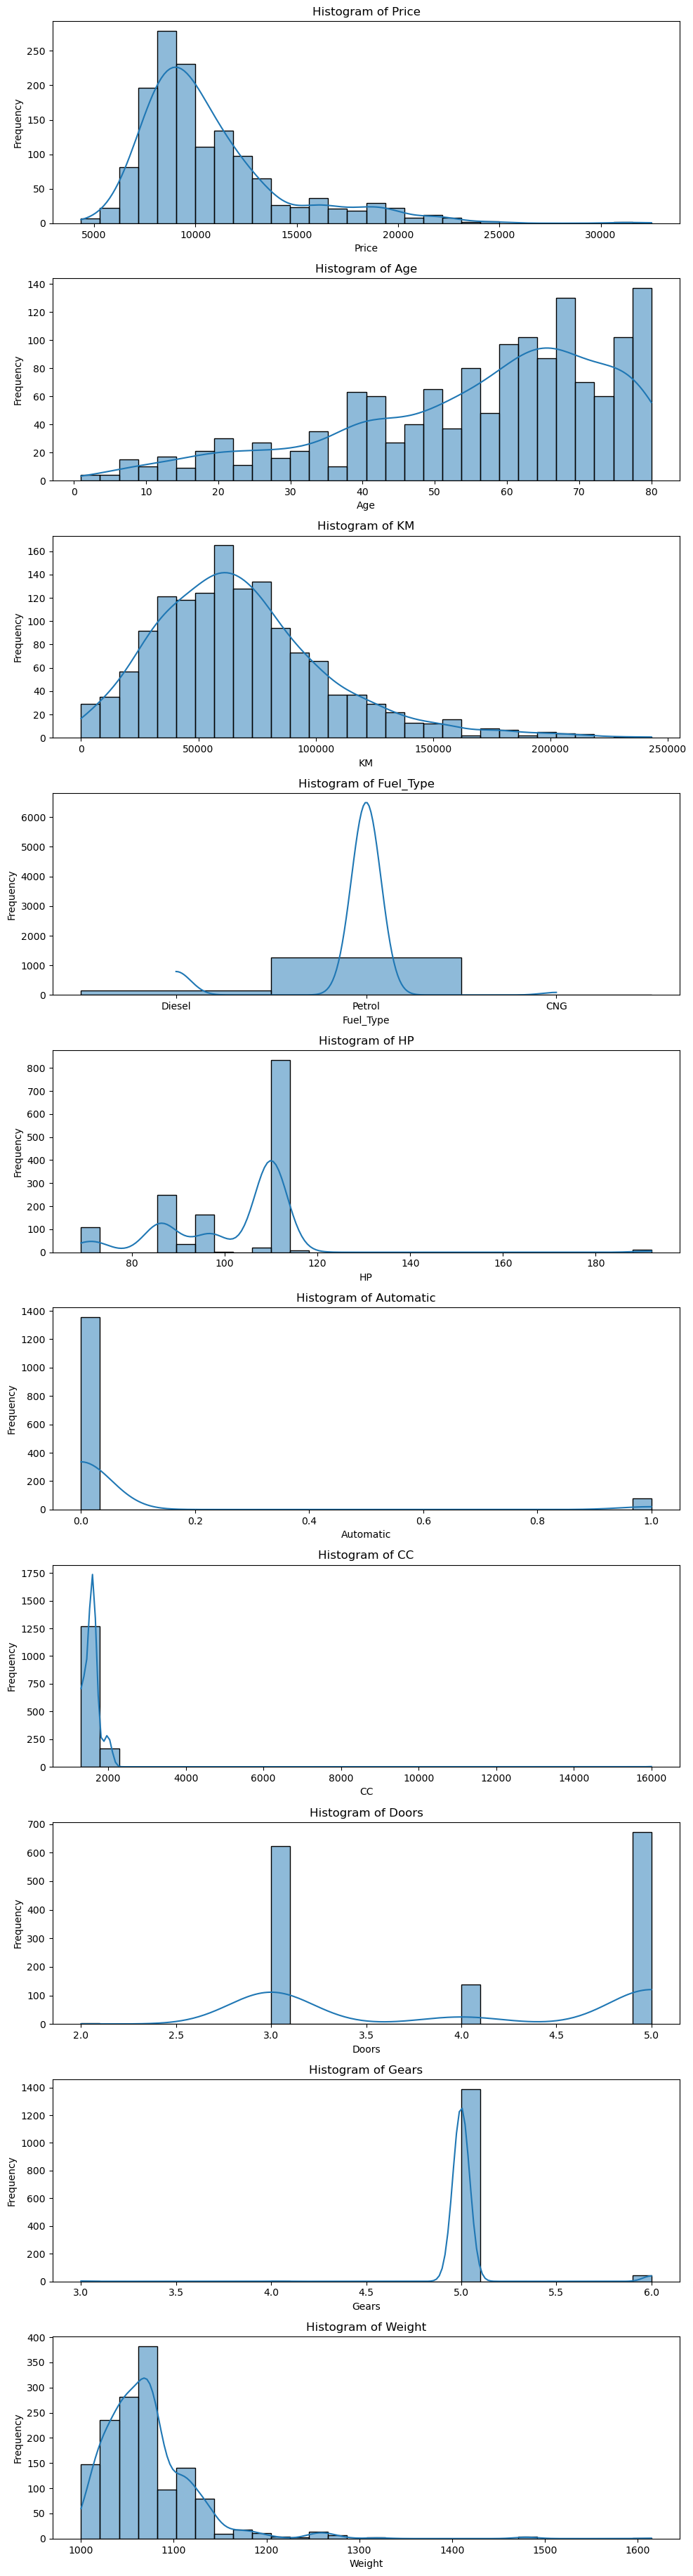

In [10]:
# VISUALIZATION

# Distribution of features
# plot Histogram of features
fig = plt.figure(figsize = (10,40))
for i, column in enumerate( data,1):
    plt.subplot(11,1,i)
    sns.histplot(data[column], bins = 30, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
data_cont = data[['Price','Age','KM','HP','Weight']]
data_cont.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [12]:
data_dis = data[['Fuel_Type','Automatic','CC','Doors','Gears']]
data_dis.head()

,Fuel_Type,Automatic,CC,Doors,Gears
0,Diesel,0,2000,3,5
1,Diesel,0,2000,3,5
2,Diesel,0,2000,3,5
3,Diesel,0,2000,3,5
4,Diesel,0,2000,3,5


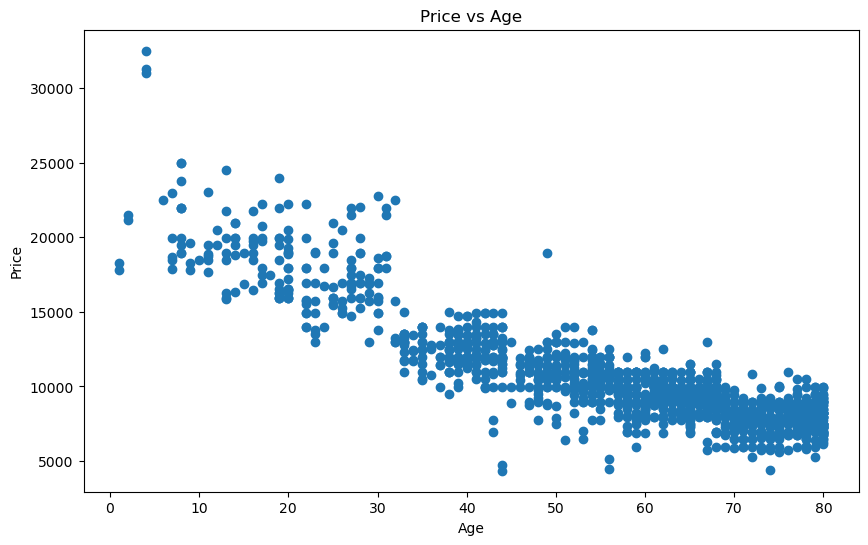

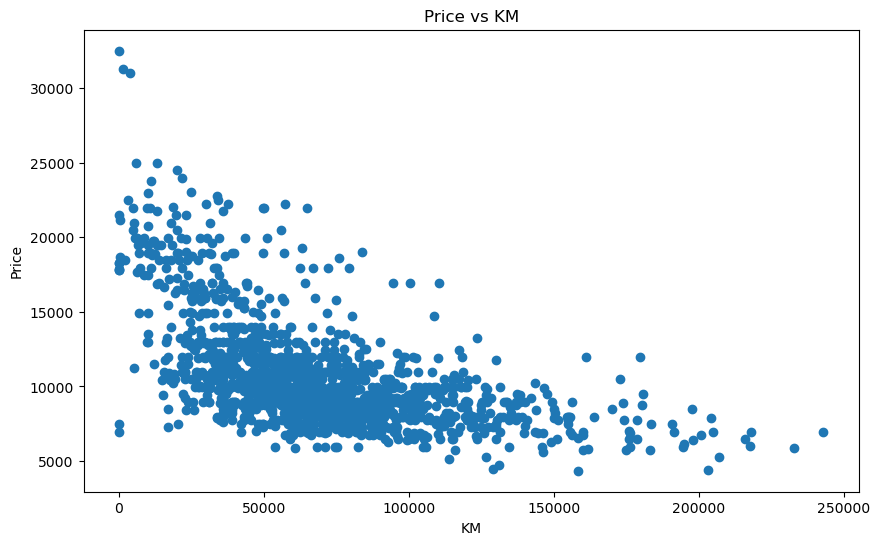

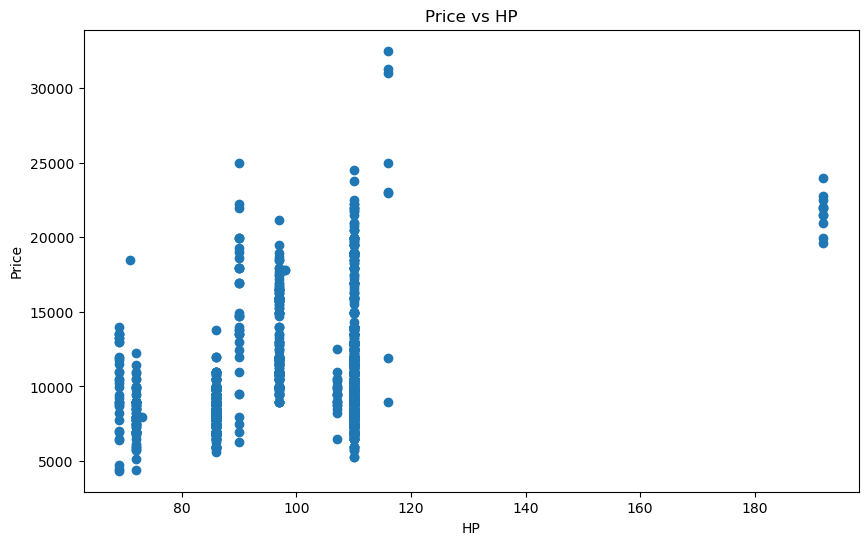

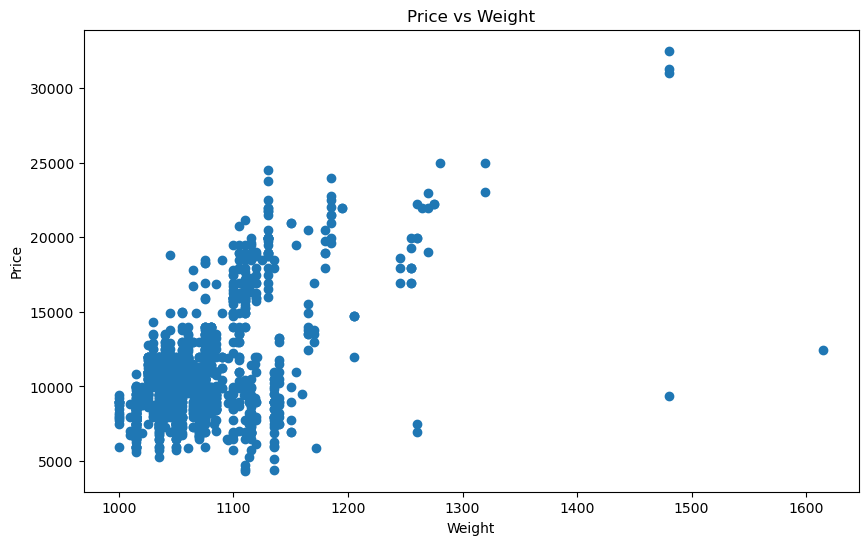

In [13]:
# Visualizing the relation between each independent features with respect to continuous features
for col in data_cont:
    if col != "Price":
        plt.figure(figsize = (10,6))
        plt.scatter(data[col],data['Price'])
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.title(f'Price vs {col}')
        plt.show()

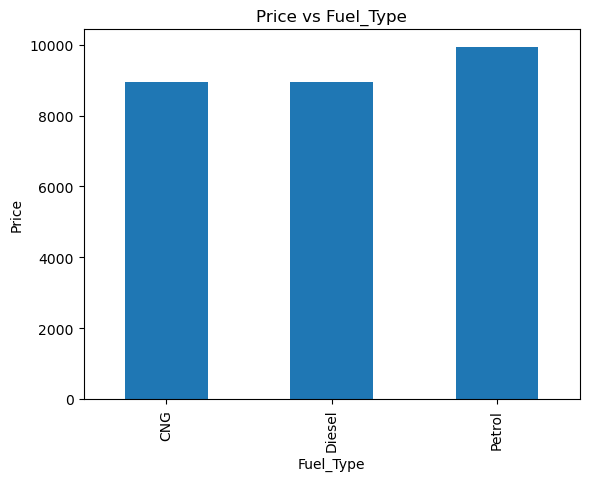

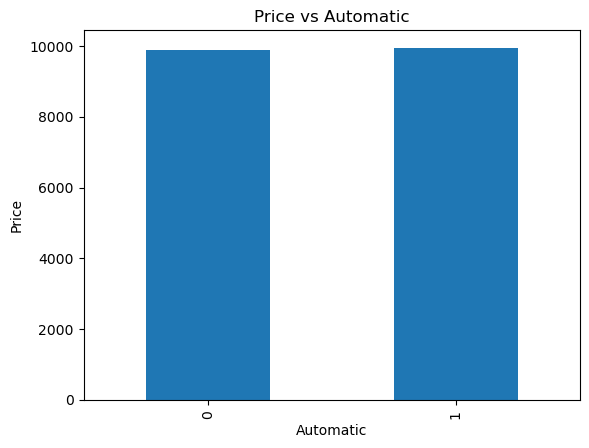

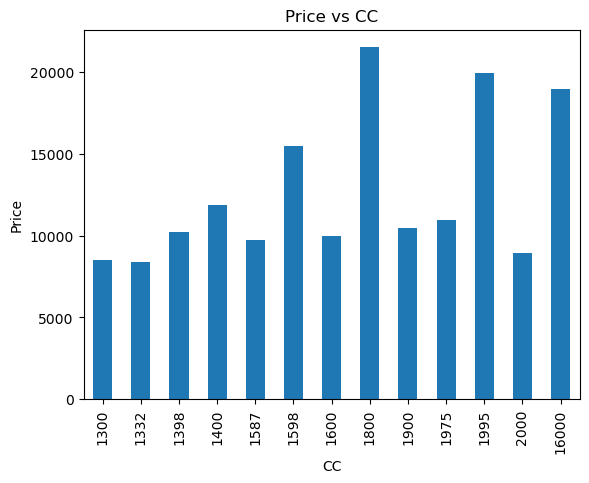

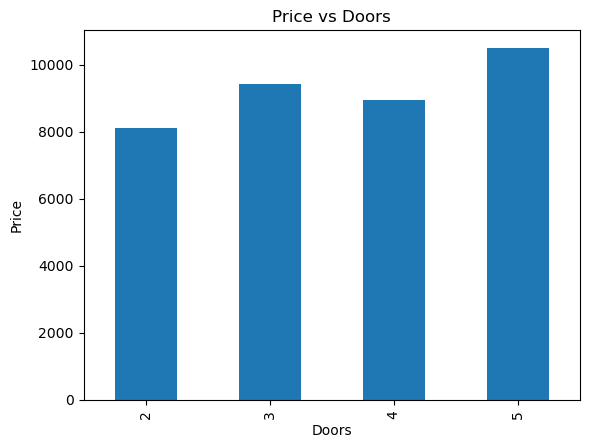

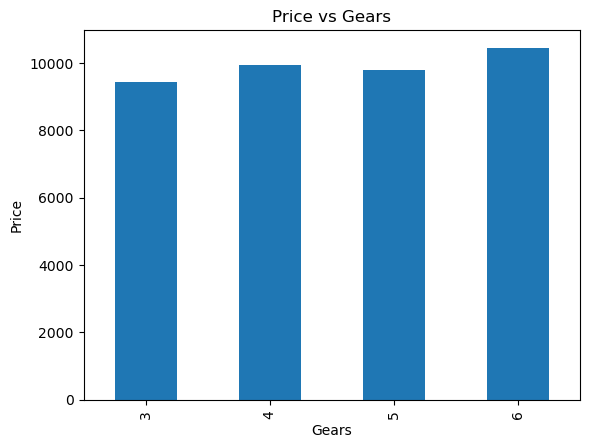

In [14]:
# Relation between the discrete variables and Price
for col in data_dis:
    data.groupby(col)['Price'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Price vs {col}')
    plt.show()

In [15]:
# Checking Correlation
data.corr(numeric_only = True)

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499
CC,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000


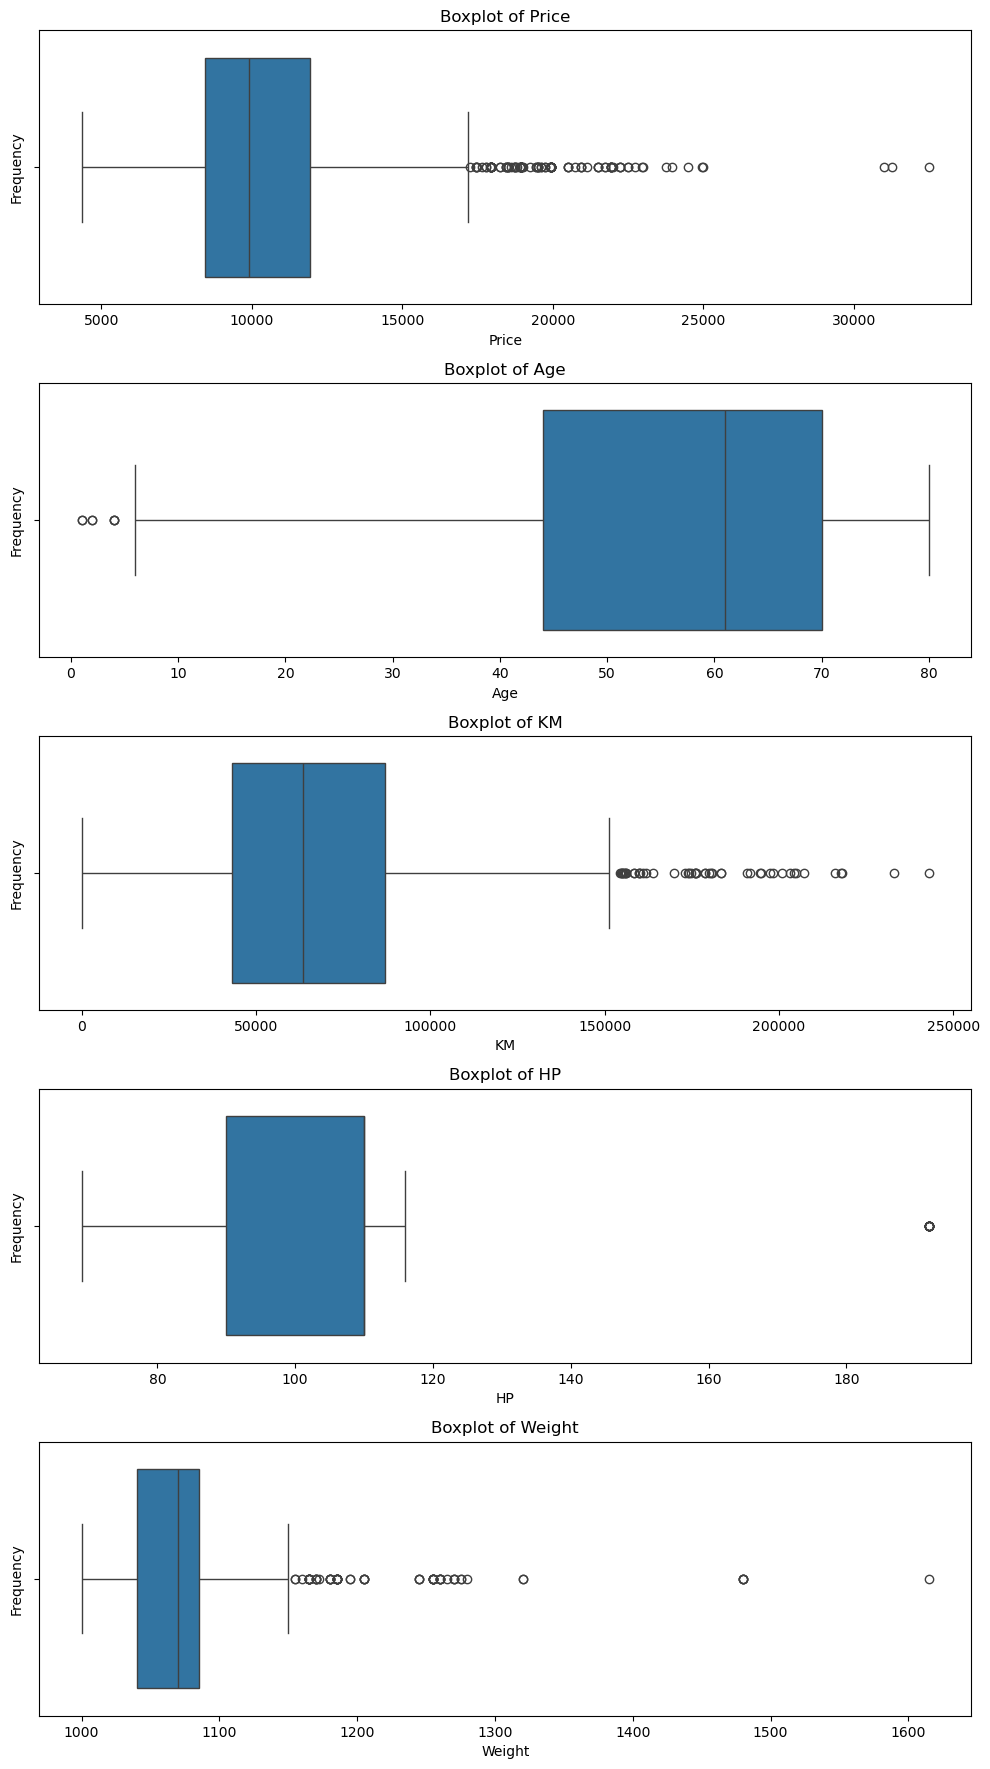

In [16]:
# BOXPLOTs for Outlier Detection
col = data_cont.columns

plt.figure(figsize = (10,35))
for i, column in enumerate(col,1):
    plt.subplot(10,1,i)
    sns.boxplot(x = data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [17]:
# function to detect and cap outliers using IQR method
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Iterate through numerical columns and cap outliers
for column in data_cont.columns:
    data_cont = cap_outliers_iqr(data_cont, column)


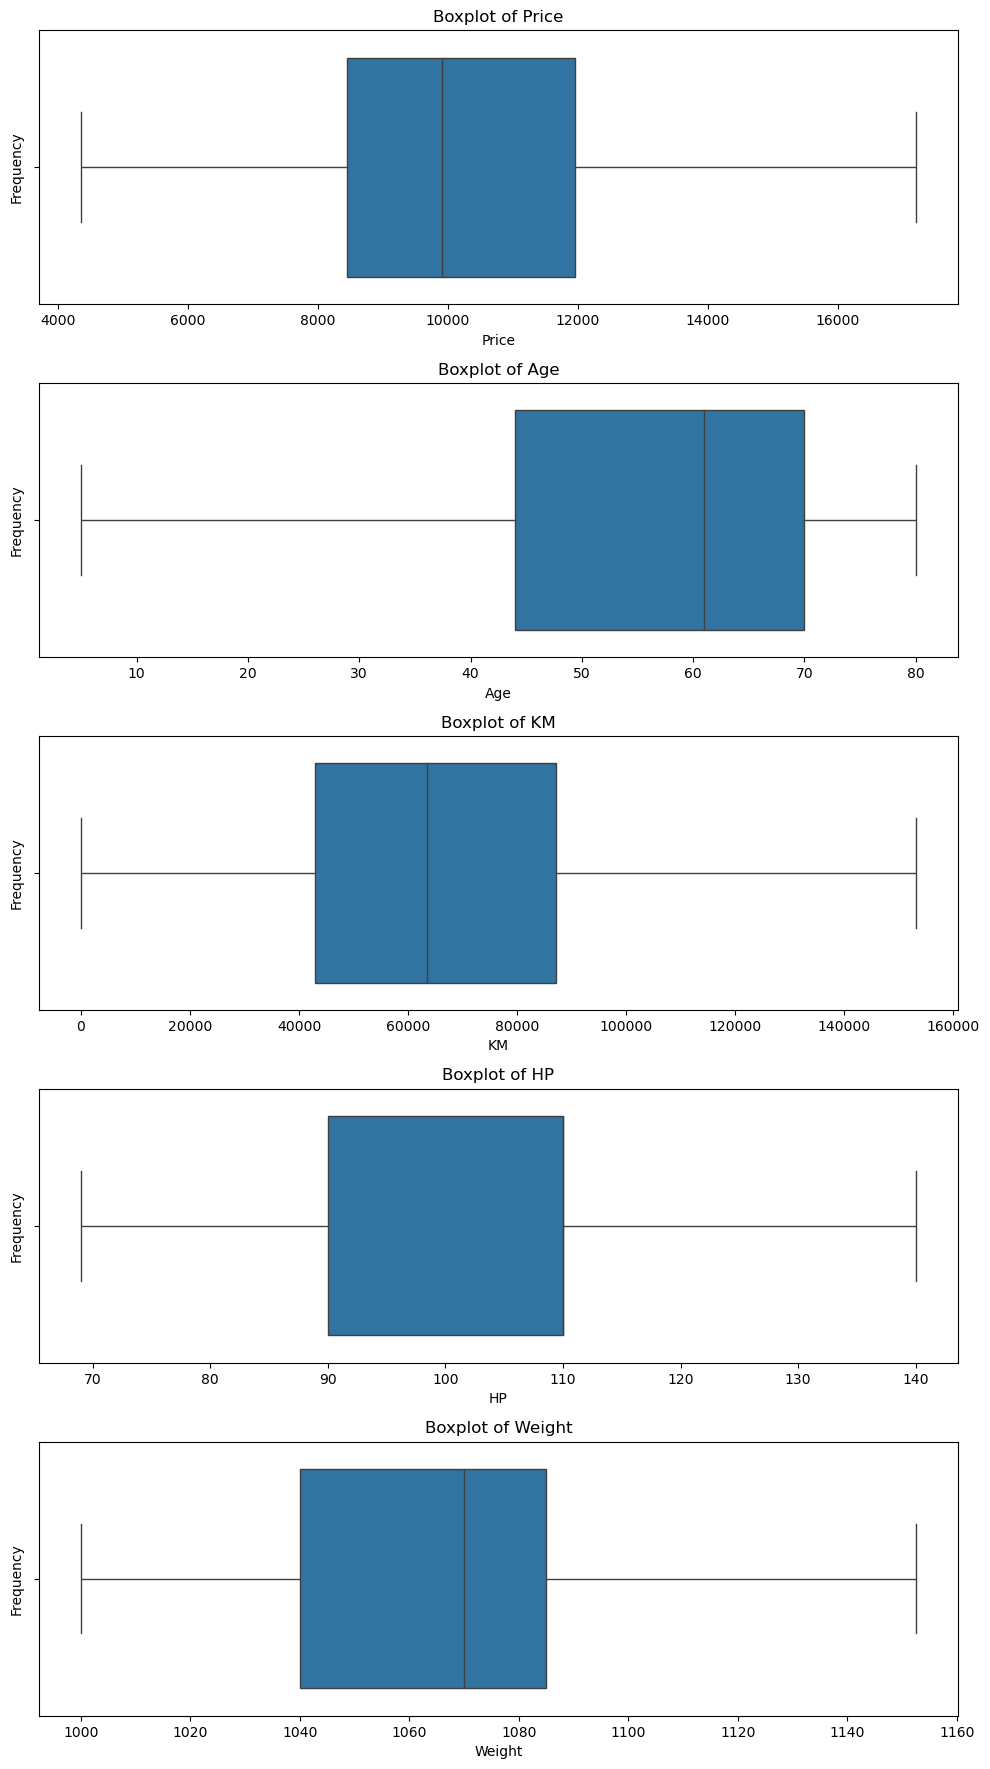

In [18]:
# BOXPLOT to check outliers
plt.figure(figsize = (10,35))
for i, column in enumerate(data_cont.columns,1):
    plt.subplot(10,1,i)
    sns.boxplot(x = data_cont[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [19]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


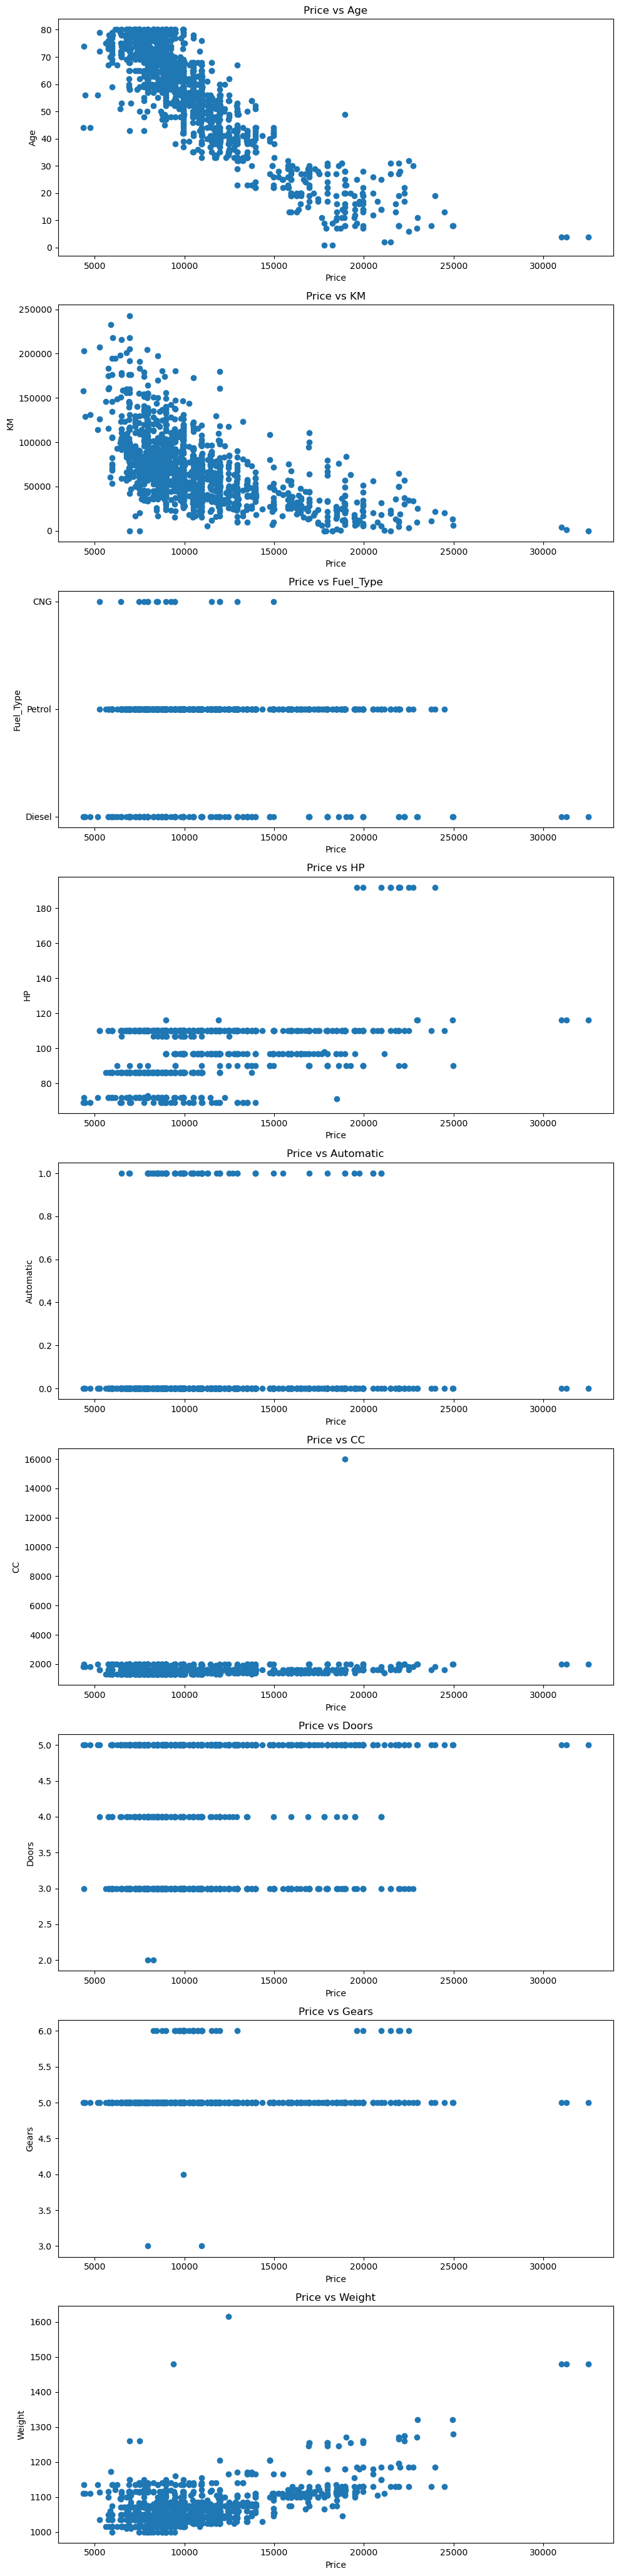

In [20]:
# checking Correlation
features = data.drop('Price', axis = 1)
plt.figure(figsize = (10, 50))
for i, col in enumerate(features, 1):
    plt.subplot(11,1,i)
    plt.scatter(x = data.Price, y = col, data = data)
    plt.title(f'Price vs {col}')
    plt.xlabel('Price')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()


There is a strong negative correlation between Age and KM with Price. A slight positive correlation between HP and Weight with the Price. Relationshipb between Automatic, CC, Door,  Gears and Fuel_Type(Petrol, Diesel, CNG)  with Price is little to no relationship..

These patterns suggest that Age, KM, HP and Weight are more likely to be useful predictors in a MLR model for predicting the car prices.

In [21]:
# Correlation Matrix 
corr_mat = data.corr(numeric_only = True)
print('CORRELATION MATRIX:\n')
corr_mat

CORRELATION MATRIX:



,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499
CC,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000


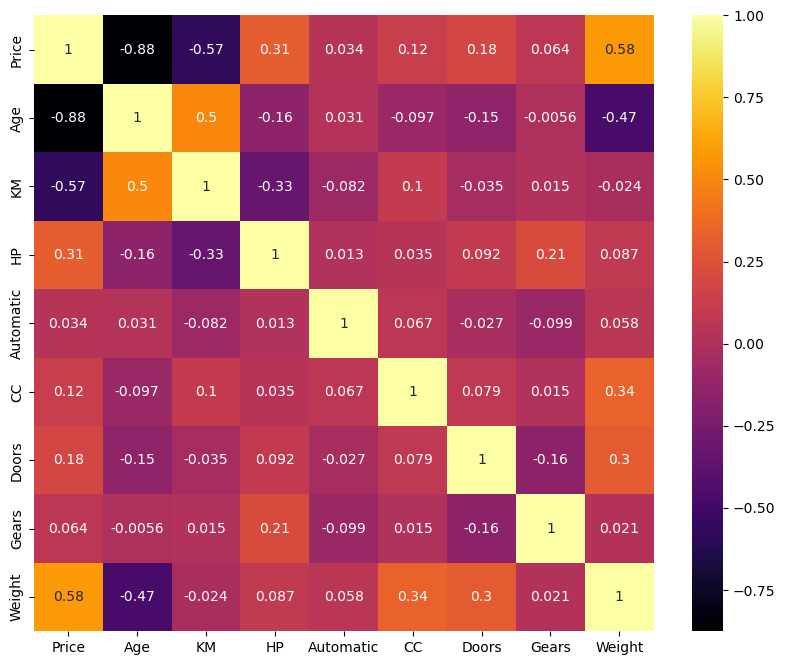

In [22]:
# Confirming correlation using Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(corr_mat, annot = True, cmap = 'inferno')
plt.show()

In [23]:
data_new = pd.concat([data_cont,data_dis], axis = 1)
data_new.head()

,Price,Age,KM,HP,Weight,Fuel_Type,Automatic,CC,Doors,Gears
0,13500.0,23.0,46986.0,90.0,1152.5,Diesel,0,2000,3,5
1,13750.0,23.0,72937.0,90.0,1152.5,Diesel,0,2000,3,5
2,13950.0,24.0,41711.0,90.0,1152.5,Diesel,0,2000,3,5
3,14950.0,26.0,48000.0,90.0,1152.5,Diesel,0,2000,3,5
4,13750.0,30.0,38500.0,90.0,1152.5,Diesel,0,2000,3,5


In [24]:
# PREPROCESSING

# Convert the 'Fuel_Type' categorical variable into dummy variables
data_new = pd.get_dummies(data_new, columns = ['Fuel_Type','Automatic'])
data_new.rename(columns = {'Fuel_Type_Petrol':'Petrol','Fuel_Type_Diesel':'Diesel','Fuel_Type_CNG':'CNG','Automatic_0':'Manual','Automatic_1':'Automatic'}, inplace = True)
data_new.head()

,Price,Age,KM,HP,Weight,CC,Doors,Gears,CNG,Diesel,Petrol,Manual,Automatic
0,13500.0,23.0,46986.0,90.0,1152.5,2000,3,5,False,True,False,True,False
1,13750.0,23.0,72937.0,90.0,1152.5,2000,3,5,False,True,False,True,False
2,13950.0,24.0,41711.0,90.0,1152.5,2000,3,5,False,True,False,True,False
3,14950.0,26.0,48000.0,90.0,1152.5,2000,3,5,False,True,False,True,False
4,13750.0,30.0,38500.0,90.0,1152.5,2000,3,5,False,True,False,True,False


In [25]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = pd.DataFrame(sc.fit_transform(data_new), columns = data_new.columns)
data_sc.head()

,Price,Age,KM,HP,Weight,CC,Doors,Gears,CNG,Diesel,Petrol,Manual,Automatic
0,1.009230,-1.781129,-0.595118,-0.844145,2.226997,0.998113,-1.084443,-0.140475,-0.109493,2.884126,-2.718789,0.242983,-0.242983
1,1.093220,-1.781129,0.152463,-0.844145,2.226997,0.998113,-1.084443,-0.140475,-0.109493,2.884126,-2.718789,0.242983,-0.242983
2,1.160412,-1.727143,-0.747078,-0.844145,2.226997,0.998113,-1.084443,-0.140475,-0.109493,2.884126,-2.718789,0.242983,-0.242983
3,1.496370,-1.619171,-0.565908,-0.844145,2.226997,0.998113,-1.084443,-0.140475,-0.109493,2.884126,-2.718789,0.242983,-0.242983
4,1.093220,-1.403226,-0.839578,-0.844145,2.226997,0.998113,-1.084443,-0.140475,-0.109493,2.884126,-2.718789,0.242983,-0.242983


#### MODEL BUILDING & MODEL TRAINING

In [ ]:
# Define feature variable (X) and target variable (Y)
X = data_sc.drop(columns = ['Price'])
Y = data_sc['Price']

# Splitting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1000)

In [36]:
# LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# MODEL TRAINING
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

# Coefficients
LR_coef = pd.DataFrame(LR_model.coef_, X.columns, columns = ['Coefficient'])
print(LR_coef)

# PREDICTIONS
Y_pred = LR_model.predict(X_test)

# MODEL EVALUATION
print('\nMODEL EVALUATION')
lr_mse = mean_squared_error(Y_test, Y_pred)
lr_r2 = r2_score(Y_test, Y_pred)
print(f'Mean Square Error: {lr_mse}')
print(f'R-squared: {lr_r2}')


           Coefficient
Age          -0.673800
KM           -0.186884
HP            0.012253
Weight        0.280690
CC            0.003214
Doors        -0.023245
Gears         0.028175
CNG          -0.012282
Diesel       -0.077009
Petrol        0.077673
Manual       -0.004105
Automatic     0.004105

MODEL EVALUATION
Mean Square Error: 0.12038545468537462
R-squared: 0.879982884752299


In [37]:
# LASSO REGRESSION MODEL
from sklearn.linear_model import Lasso

# MODEL TRAINING
Lasso_model = Lasso(alpha = 0.05)
Lasso_model.fit(X_train, Y_train)

# Coefficients
Lasso_coef = pd.DataFrame(Lasso_model.coef_, X.columns, columns = ['Coefficient'])
print(Lasso_coef)

# PREDICTIONS
Y_pred = Lasso_model.predict(X_test)

# MODEL EVALUATION
print('\nMODEL EVALUATION')
lasso_mse = mean_squared_error(Y_test, Y_pred)
lasso_r2 = r2_score(Y_test, Y_pred)
print(f'Mean Square Error: {lasso_mse}')
print(f'R-squared: {lasso_r2}')

           Coefficient
Age          -0.670931
KM           -0.185990
HP            0.056574
Weight        0.134557
CC            0.000000
Doors         0.000000
Gears         0.000000
CNG          -0.000000
Diesel       -0.000000
Petrol        0.000000
Manual       -0.000000
Automatic     0.000000

MODEL EVALUATION
Mean Square Error: 0.13502507922878723
R-squared: 0.8653880525892131


In [38]:
# RIDGE REGRESSION MODEL
from sklearn.linear_model import Ridge

# MODEL TRAINING
Ridge_model = Ridge(alpha = 0.05)
Ridge_model.fit(X_train, Y_train)

# Coefficients
Ridge_coef = pd.DataFrame(Ridge_model.coef_, X.columns, columns = ['Coefficient'])
print(Ridge_coef)

# PREDICTIONS
Y_pred = Ridge_model.predict(X_test)

# MODEL EVALUATION
print('\nMODEL EVALUATION')
ridge_mse = mean_squared_error(Y_test, Y_pred)
ridge_r2 = r2_score(Y_test, Y_pred)
print(f'Mean Square Error: {ridge_mse}')
print(f'R-squared: {ridge_r2}')

           Coefficient
Age          -0.673763
KM           -0.186904
HP            0.012274
Weight        0.280667
CC            0.003213
Doors        -0.023234
Gears         0.028176
CNG          -0.012284
Diesel       -0.076988
Petrol        0.077653
Manual       -0.004106
Automatic     0.004106

MODEL EVALUATION
Mean Square Error: 0.12038736062112024
R-squared: 0.8799809846480827


In [39]:
# MODEL COMPARISON

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE': [lr_mse, lasso_mse, ridge_mse],
    'R-squared': [lr_r2, lasso_r2, ridge_r2]
})

print('Comparison of Models:\n',results)

Comparison of Models:
                Model       MSE  R-squared
0  Linear Regression  0.120385   0.879983
1   Lasso Regression  0.135025   0.865388
2   Ridge Regression  0.120387   0.879981
